## Lead Score Case Study

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:
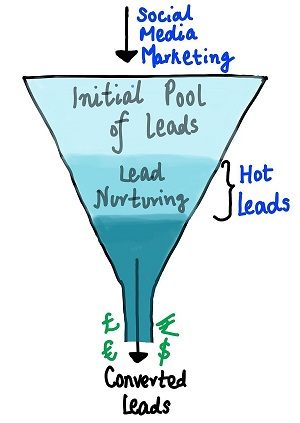

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Goals of the Case Study
There are quite a few goals for this case study:

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

## Import libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Leads.csv')
df.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


## Basic analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


looks like there are outliers present in TotalVisits, Total Time Spent on Website, 	Page Views Per Visit

## Data cleaning

We observe that there are 'Select' values in many columns.It may be because the customer did not select any option from the list, hence it shows 'Select'.'Select' values are as good as NULL. So we can convert these values to null values.

In [5]:
# replace select with np.nan
df = df.replace('Select', np.nan)

In [6]:
# percentage of null values in each column
df.isnull().sum()*100/len(df) 

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [7]:
# drop columns which has more than 40% data missing
df.isnull().sum()[df.isnull().sum()*100/len(df) > 40]

How did you hear about X Education    7250
Lead Quality                          4767
Lead Profile                          6855
Asymmetrique Activity Index           4218
Asymmetrique Profile Index            4218
Asymmetrique Activity Score           4218
Asymmetrique Profile Score            4218
dtype: int64

In [8]:
# included city because it is near to 40 (39.7)
col = ['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'City','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score']
df.drop(col, axis=1, inplace=True)

In [9]:
df.shape

(9240, 29)

## EDA

### Univariate analysis

#### Lead Origin
- most of the leads come from Landing Page submission
- Lead add form, lead import and quick add form these categories has very low ratio compared to other two
- Hence combine these 3 categories into other

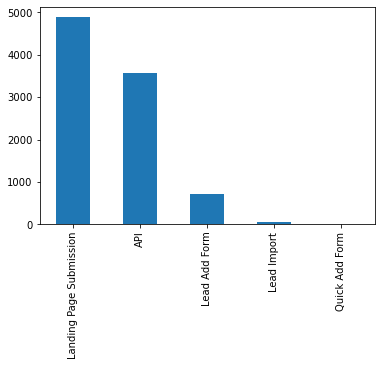

In [10]:
df['Lead Origin'].value_counts().plot.bar()
plt.show()

In [11]:
df['Lead Origin'] = df['Lead Origin'].apply(lambda x: 'Other' if x in ['Lead Add Form','Lead Import','Quick Add Form'] else x)

In [12]:
df['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Other                       774
Name: Lead Origin, dtype: int64

#### Lead Source
- keep columns with more than 100 value and
- add remaining values into other category if count is <100

In [13]:
df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

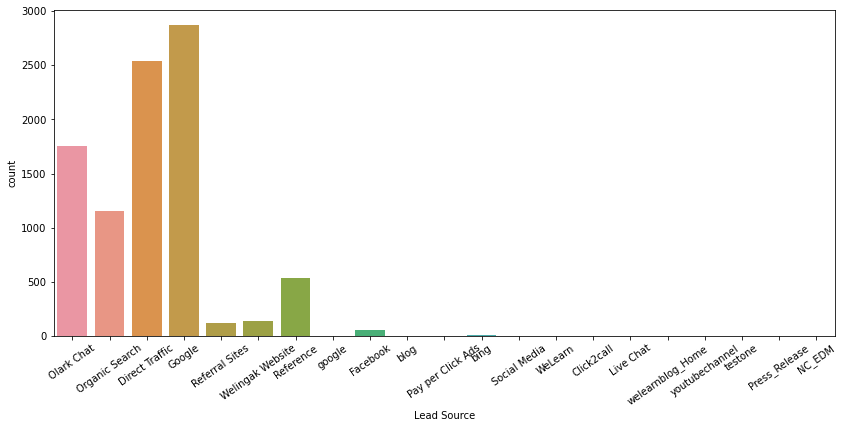

In [14]:
plt.figure(figsize=(14,6))
sns.countplot(df['Lead Source'])
plt.xticks(rotation=35)
plt.show()

In [15]:
# categories with more than 100 values
lst = ['Google','Direct Traffic','Olark Chat','Organic Search','Reference','Welingak Website','Referral Sites']
df['Lead Source'] = df['Lead Source'].apply(lambda x: x if x in lst else 'Other')

In [16]:
df['Lead Source'].value_counts()

Google              2868
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Other                119
Name: Lead Source, dtype: int64

#### Combine Email and Call columns
- Very few customers have given there email and call option
- email and call both are ways of communicating so no need for separate columns


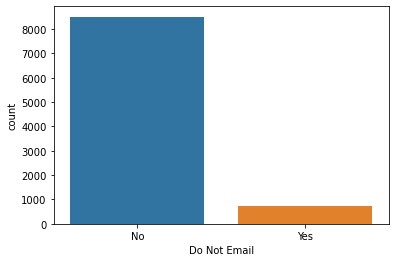

In [17]:
sns.countplot(df['Do Not Email'])
plt.show()

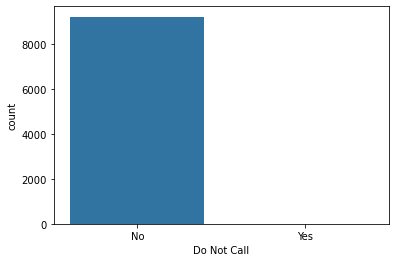

In [18]:
sns.countplot(df['Do Not Call'])
plt.show()

In [19]:
# if 'Yes' exists in either column take it as 1 or 0
df['Email_Call'] = (df['Do Not Email'] == 'Yes') | (df['Do Not Call'] == 'Yes')
df['Email_Call'] = df['Email_Call'].astype(int)

In [20]:
df['Email_Call'].value_counts()

0    8504
1     736
Name: Email_Call, dtype: int64

In [21]:
# drop 'Do Not Email', 'Do Not Call
df.drop(['Do Not Email', 'Do Not Call'],axis=1,inplace=True)

#### Converted

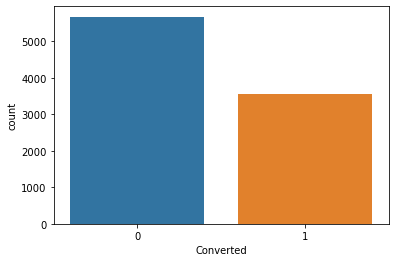

In [22]:
sns.countplot(df['Converted'])
plt.show()

In [23]:
# conversion rate from given data
100*sum(df['Converted'])/len(df['Converted'])

38.53896103896104

#### TotalVisits
- fill the null values with median
- outliers present in TotalVisits
- replace outliers with Q3+1.5*IQR

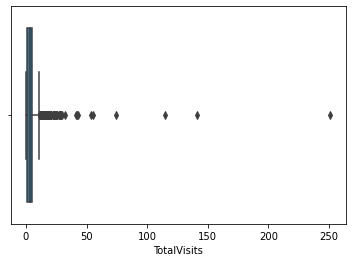

In [24]:
sns.boxplot(df['TotalVisits'])
plt.show()

In [25]:
df['TotalVisits'].isnull().sum()

137

In [26]:
# fill missing values with median
df['TotalVisits'].fillna(df['TotalVisits'].median(),inplace=True)

In [27]:
# create a function which finds upper and lower limit of boxplot
def detect_outlier(var):
    iqr = np.percentile(var,75) - np.percentile(var,25)
    up_tail = np.percentile(var,75)+1.5*iqr
    low_tail = np.percentile(var,25)-1.5*iqr
    return up_tail, low_tail

In [28]:
detect_outlier(df['TotalVisits'])

(11.0, -5.0)

In [29]:
len(df[df['TotalVisits']>11])

267

In [30]:
# use capping here
df['TotalVisits'] = df['TotalVisits'].apply(lambda x: 11 if x>11 else x)

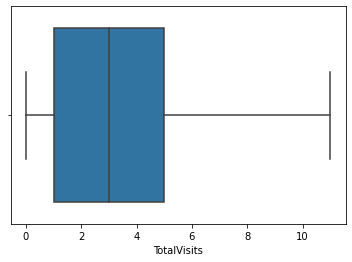

In [31]:
sns.boxplot(df['TotalVisits'])
plt.show()

#### Total Time Spent on Website
- no outliers present
- most of the values are near to zero

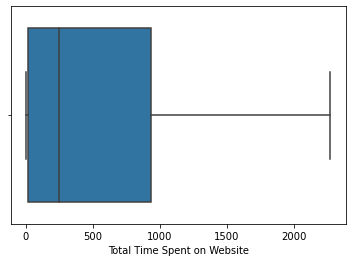

In [32]:
sns.boxplot(df['Total Time Spent on Website'])
plt.show()

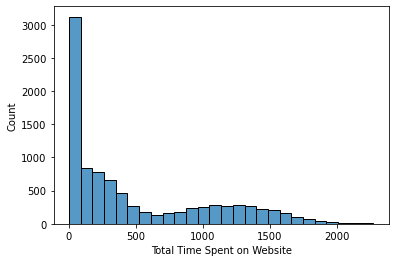

In [33]:
sns.histplot(df['Total Time Spent on Website'])
plt.show()

#### Page Views Per Visit
- missing values replace with median
- outliers present
- use capping and replace outliers with Q3+1.5*IQR

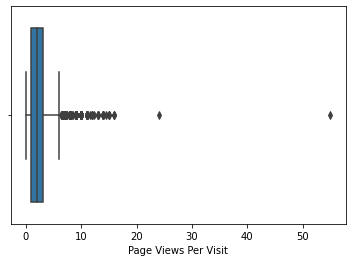

In [34]:
sns.boxplot(df['Page Views Per Visit'])
plt.show()

In [35]:
df['Page Views Per Visit'].isnull().sum()

137

In [36]:
# full with median
df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median(),inplace=True)

In [37]:
detect_outlier(df['Page Views Per Visit'])

(6.0, -2.0)

In [38]:
len(df[df['Page Views Per Visit']>6])

360

In [39]:
# use capping here
df['Page Views Per Visit']= df['Page Views Per Visit'].apply(lambda x: 6 if x>6 else x)

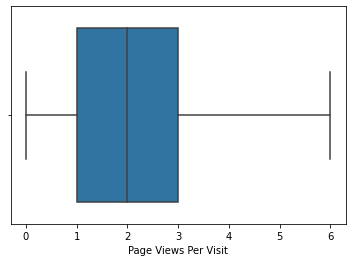

In [40]:
sns.boxplot(df['Page Views Per Visit'])
plt.show()

#### Last Activity
- if count is less than 100 then replace them with other

In [41]:
df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

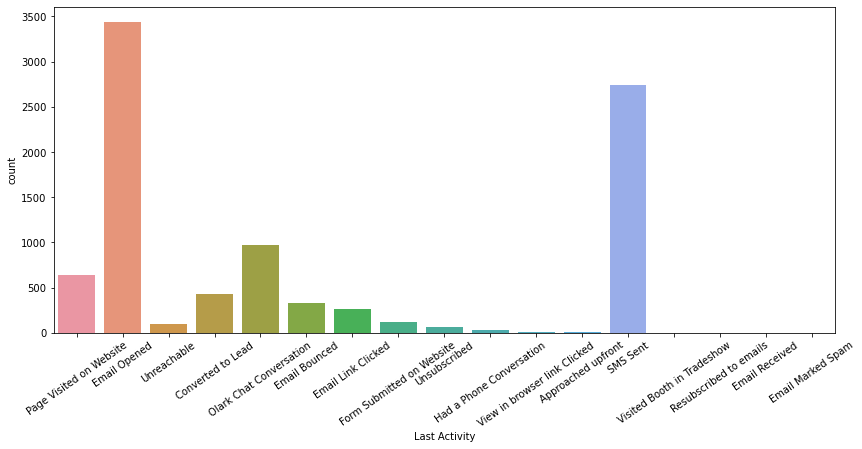

In [42]:
plt.figure(figsize=(14,6))
sns.countplot(df['Last Activity'])
plt.xticks(rotation=35)
plt.show()

In [43]:
# if value is not from below list then convert them to other
last_act = ['Email Opened','SMS Sent','Olark Chat Conversation','Page Visited on Website','Converted to Lead','Email Bounced','Email Link Clicked','Form Submitted on Website']
df['Last Activity'] = df['Last Activity'].apply(lambda x: 'Other' if x not in last_act else x)

In [44]:
df['Last Activity'].value_counts()

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Other                         308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

#### Country
- most of customers are from India
- country don't add much value to the analysis

In [45]:
df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

#### Specialization
- 'What is your current occupation' column gives the idea about customer and most of the specialization are missing values hence drop this column

In [46]:
df['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

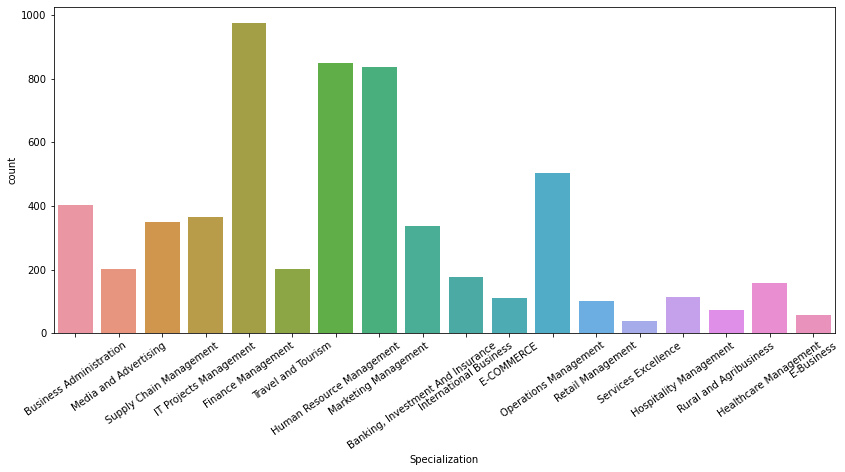

In [47]:
plt.figure(figsize=(14,6))
sns.countplot(df['Specialization'])
plt.xticks(rotation=35)
plt.show()

In [48]:
df['Specialization'].isnull().sum()

3380

In [49]:
# replace null values with other
df['Specialization'].fillna('Other', inplace=True)

#### What is your current occupation
- replace null values with mode value i.e. Unemployed

In [50]:
df['What is your current occupation'].isnull().sum()

2690

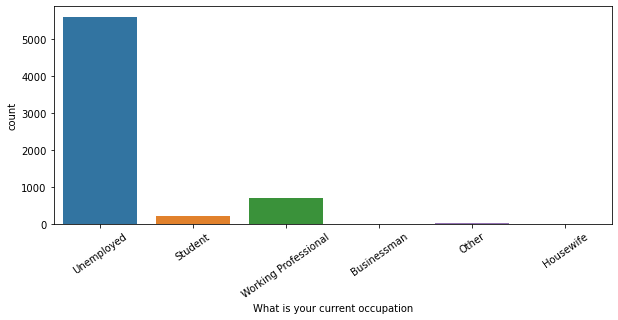

In [51]:
plt.figure(figsize=(10,4))
sns.countplot(df['What is your current occupation'])
plt.xticks(rotation=35)
plt.show()

In [52]:
df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [53]:
df['What is your current occupation'].fillna('Unemployed',inplace=True)

#### What matters most to you in choosing a course
- most of the customers are choosing course for Better career prospects
- hence this column don't add much value to analysis

In [54]:
df['What matters most to you in choosing a course'].isnull().sum()

2709

In [55]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

#### Bunch of columns
- all below columns don't add any value to the analysis because most of the values are NO, hence drop them
- 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement','Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content','Get updates on DM Content', 'I agree to pay the amount through cheque'


In [56]:
df['Search'].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [57]:
df['Magazine'].value_counts()

No    9240
Name: Magazine, dtype: int64

In [58]:
df['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [59]:
df['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [60]:
df['Newspaper'].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [61]:
df['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [62]:
df['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [63]:
df['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [64]:
df['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [65]:
df['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

In [66]:
df['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

#### Tags
- replace null values with Will revert after reading the email
- if count is less than 300 replace them with other

In [67]:
df['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [68]:
df['Tags'].isnull().sum()

3353

In [69]:
df['Tags'].fillna('Will revert after reading the email',inplace=True)

In [70]:
df['Tags'].value_counts()

Will revert after reading the email                  5425
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [71]:
# if category not in below list replace them with other
tags_keep = ['Will revert after reading the email','Ringing','Interested in other courses','Already a student','Closed by Horizzon']
df['Tags'] = df['Tags'].apply(lambda x: 'Other' if x not in tags_keep else x)

In [72]:
df['Tags'].value_counts()

Will revert after reading the email    5425
Other                                  1276
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
Name: Tags, dtype: int64

#### A free copy of Mastering The Interview
- convert Yes:1 and No:0

In [73]:
df['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

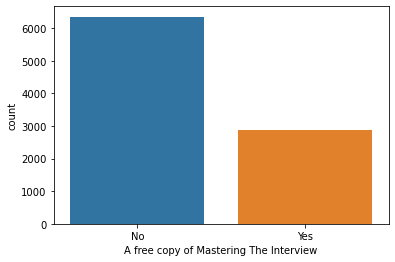

In [74]:
sns.countplot(df['A free copy of Mastering The Interview'])
plt.show()

In [75]:
df['A free copy of Mastering The Interview'] = df['A free copy of Mastering The Interview'].apply(lambda x: 1 if x=='Yes' else 0)

#### Last Notable Activity
- Last activity and last notable activity gives mostly same info
- hence use last notable activity and drop last activity

In [76]:
df['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

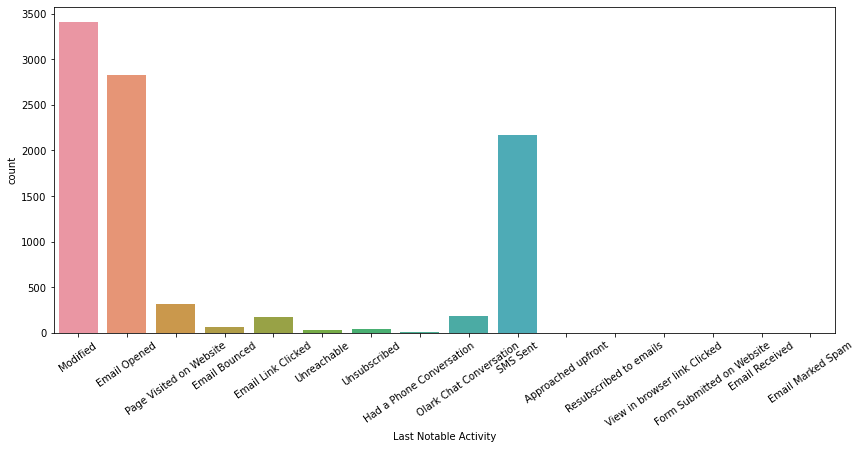

In [77]:
plt.figure(figsize=(14,6))
sns.countplot(df['Last Notable Activity'])
plt.xticks(rotation=35)
plt.show()

In [78]:
# if category is not from below list replace them with other
lst_notable_act = ['Modified','Email Opened', 'SMS Sent', 'Page Visited on Website', 'Olark Chat Conversation', 'Email Link Clicked']
df['Last Notable Activity'] = df['Last Notable Activity'].apply(lambda x: 'Other' if x not in lst_notable_act else x)

#### Columns which are not usefull and we have analysed them in bunch of columns

In [79]:
no_use_col = ['Prospect ID','Lead Number','Country',
              'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses', 
       'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']

In [80]:
# drop the columns which are not usefull
df.drop(no_use_col, axis=1,inplace=True)

In [81]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Email_Call'],
      dtype='object')

In [82]:
df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity,Email_Call
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Other,Unemployed,Interested in other courses,0,Modified,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Other,Unemployed,Ringing,0,Email Opened,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,1,Email Opened,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other,Media and Advertising,Unemployed,Ringing,0,Modified,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Other,Unemployed,Will revert after reading the email,0,Modified,0


In [83]:
df.shape

(9240, 13)

In [84]:
df.isnull().sum()

Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Tags                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
Email_Call                                0
dtype: int64

In [85]:
df.head(2)

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity,Email_Call
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Other,Unemployed,Interested in other courses,0,Modified,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Other,Unemployed,Ringing,0,Email Opened,0


In [86]:
df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Email_Call
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.217424,487.698268,2.255105,0.312554,0.079654
std,0.486714,2.860471,548.021466,1.779471,0.463559,0.270771
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000,0.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000,0.000000,0.000000
75%,1.000000,5.000000,936.000000,3.000000,1.000000,0.000000
max,1.000000,11.000000,2272.000000,6.000000,1.000000,1.000000


## Bivariate analysis

### Converted vs Total Time Spent on Website
- people who spend more time on website has higher chances of conversion
- and customers with A free copy of Mastering The Interview has higher chances of conversion

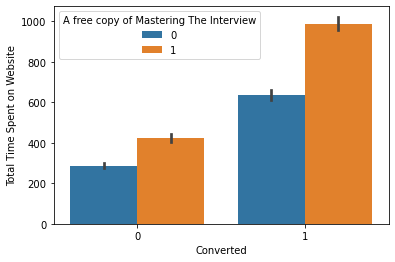

In [87]:
sns.barplot(df['Converted'], df['Total Time Spent on Website'], hue=df['A free copy of Mastering The Interview'])
plt.show()

### Lead origin and converted
- other category customers has more posiblity of conversion

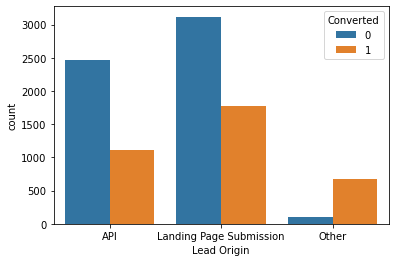

In [88]:
sns.countplot(data=df, x='Lead Origin', hue='Converted')
plt.show()

### Lead source and converted
- customers with Reference and Welingak website are mostly converted 

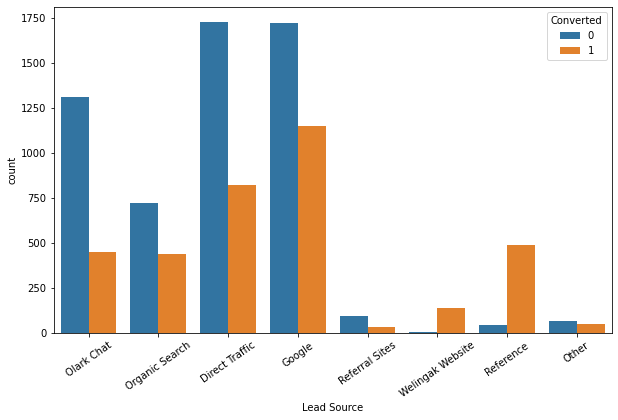

In [89]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Lead Source', hue='Converted')
plt.xticks(rotation=35)
plt.show()

### TotalVisits and convertd
- customers whoes TotalVisits are more are likely to convert

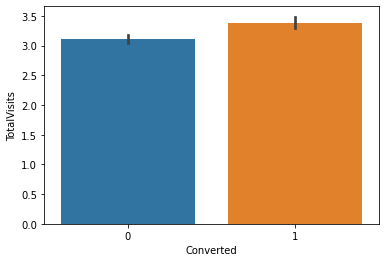

In [90]:
sns.barplot(x=df['Converted'], y=df['TotalVisits'])
plt.show()

### Total Time Spent on Website and converted
- customers who spend more time on website they are converted

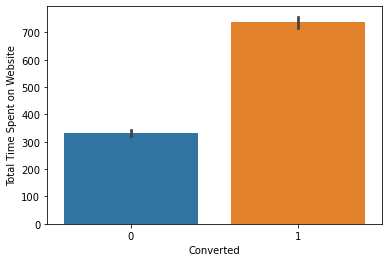

In [91]:
sns.barplot(x=df['Converted'], y=df['Total Time Spent on Website'])
plt.show()

### Page Views Per Visit and converted
- no such difference

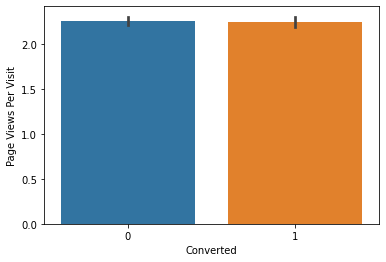

In [92]:
sns.barplot(x=df['Converted'], y=df['Page Views Per Visit'])
plt.show()

### Last Activity and converted
- SMS sent as a last activity has higher chances of converstion

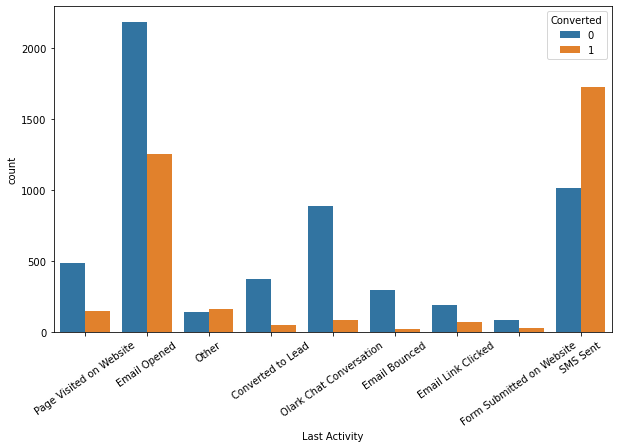

In [93]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Last Activity', hue='Converted')
plt.xticks(rotation=35)
plt.show()

### Specialization and converted


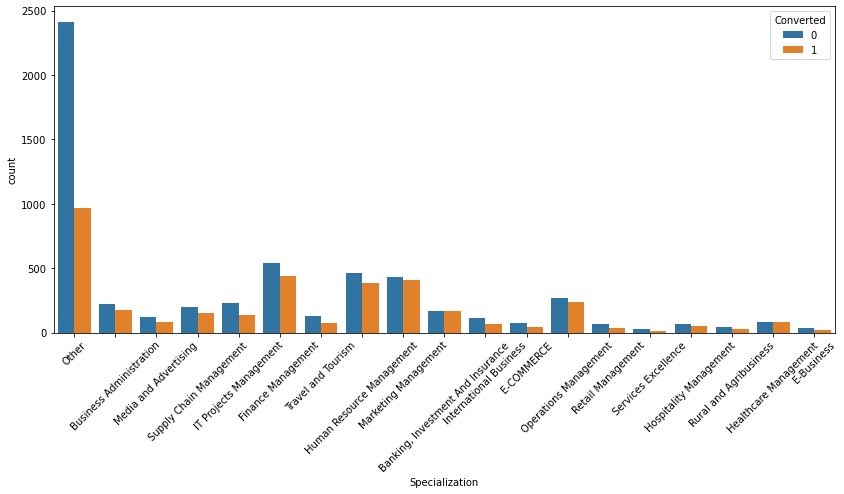

In [94]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='Specialization', hue='Converted')
plt.xticks(rotation=45)
plt.show()

### What is your current occupation	and converted
- working professionals have taken the course as compared to other customers

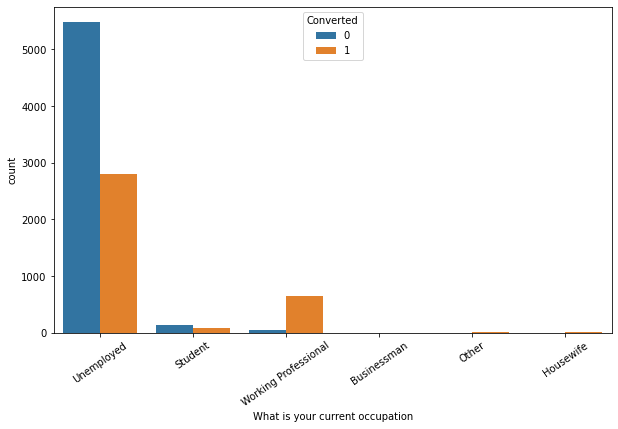

In [95]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='What is your current occupation', hue='Converted')
plt.xticks(rotation=35)
plt.show()

### Tags and converted
- will revert after reading the email and closed by horizon these tags has more possiblity of conversion

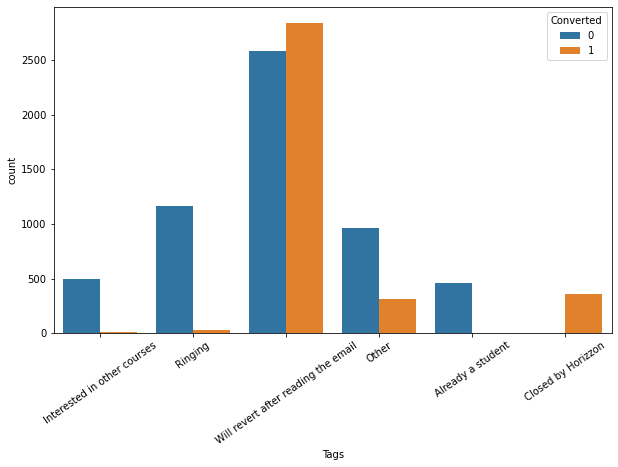

In [96]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Tags', hue='Converted')
plt.xticks(rotation=35)
plt.show()

### A free copy of Mastering The Interview and converted

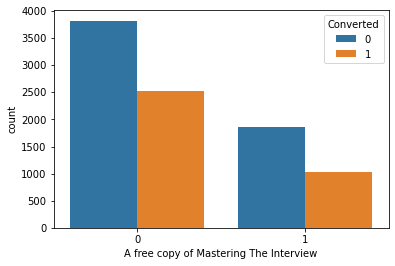

In [97]:
sns.countplot(data=df, x='A free copy of Mastering The Interview', hue='Converted')
plt.show()

### Last Notable Activity and convertd
- customers whoes last notable activity is sms sent are likely to be converted

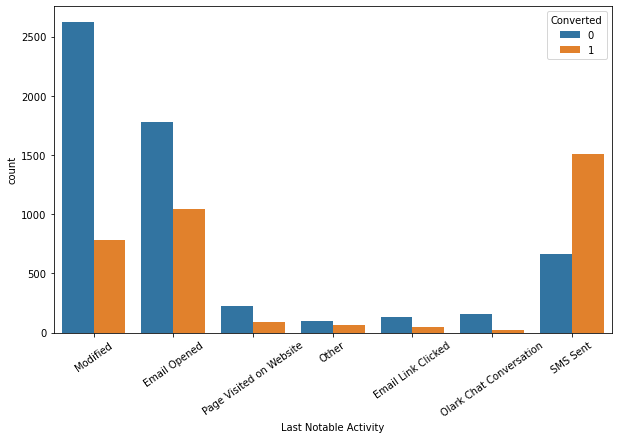

In [98]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Last Notable Activity', hue='Converted')
plt.xticks(rotation=35)
plt.show()

### Email_call and converted

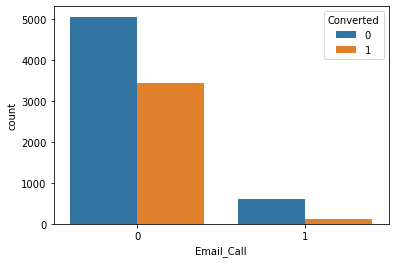

In [99]:
sns.countplot(data=df, x='Email_Call', hue='Converted')
plt.show()

## Multivariate analysis

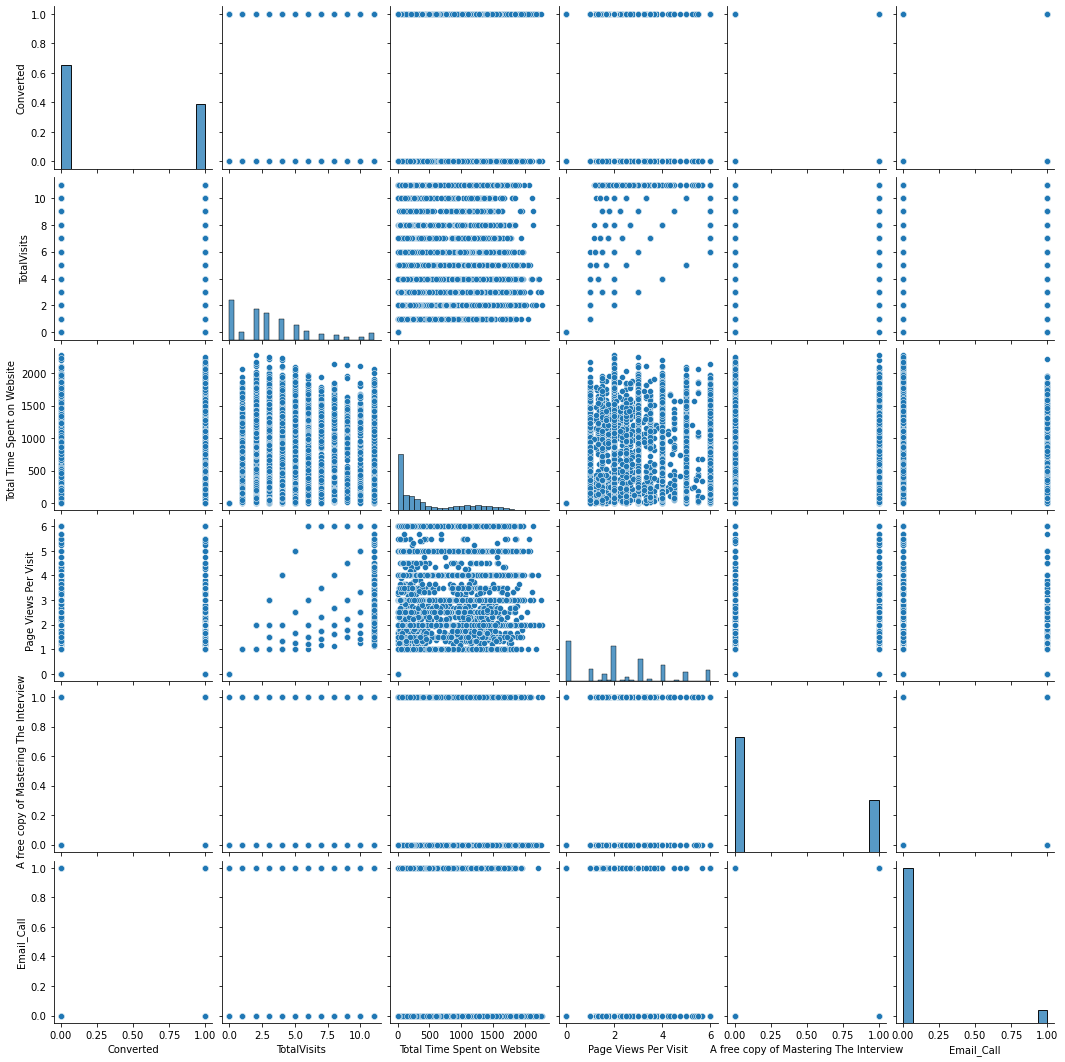

In [100]:
sns.pairplot(df)
plt.show()

## Data Preparation

In [101]:
df.head(2)

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity,Email_Call
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Other,Unemployed,Interested in other courses,0,Modified,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Other,Unemployed,Ringing,0,Email Opened,0


In [102]:
# dummy variable creation
new_df = pd.get_dummies(df,prefix=['Lead Origin','Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags', 'Last Notable Activity'], drop_first=True)
new_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Email_Call,Lead Origin_Landing Page Submission,Lead Origin_Other,Lead Source_Google,Lead Source_Olark Chat,...,Tags_Interested in other courses,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,1.0,305,1.0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,1,2.0,1428,1.0,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0


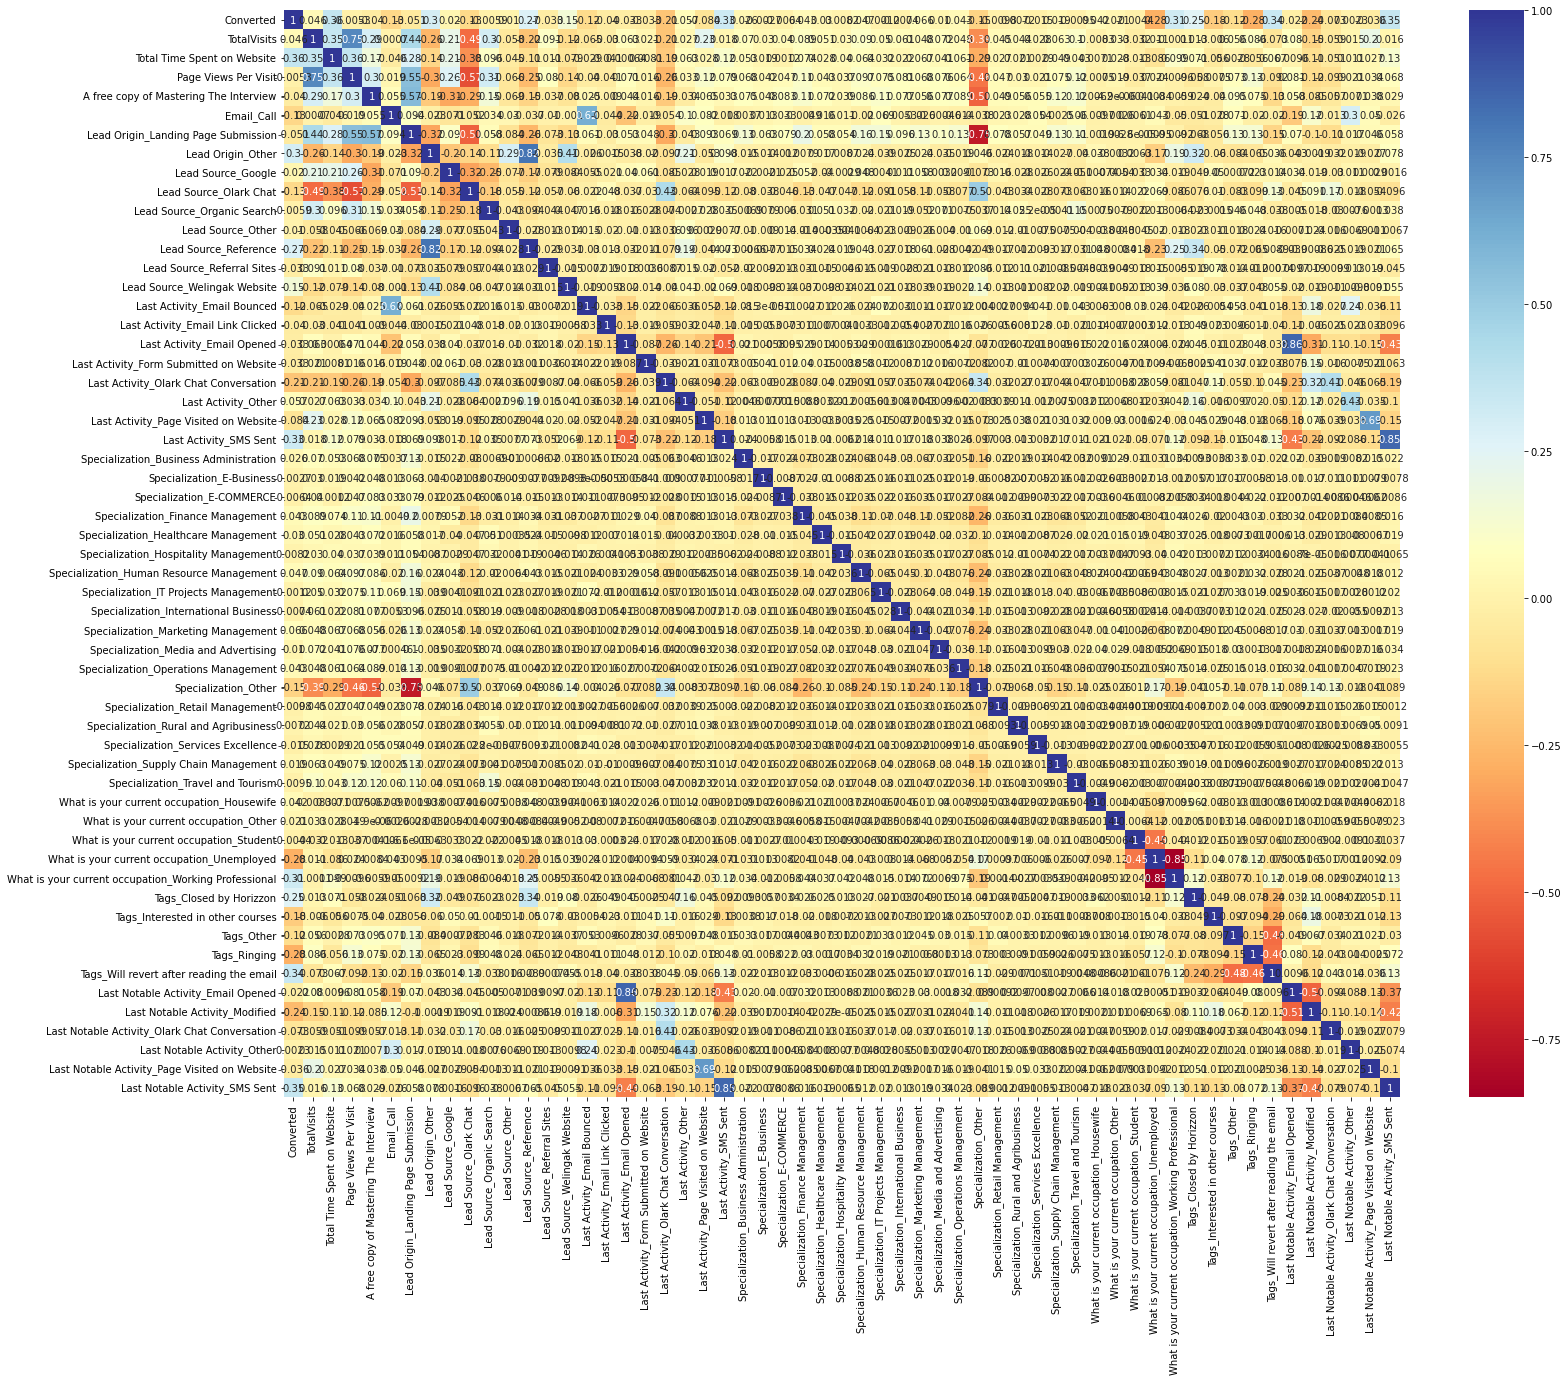

In [103]:
plt.figure(figsize = (25,20))
sns.heatmap(new_df.corr(), annot=True, cmap='RdYlBu')
plt.show()

###  train test split

In [104]:
y = new_df['Converted']
X = new_df.drop('Converted', axis=1)

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### scaling

In [106]:
# scalling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scale_col = ['TotalVisits' ,'Total Time Spent on Website','Page Views Per Visit']
X_train[scale_col] = scaler.fit_transform(X_train[scale_col])

X_test[scale_col] = scaler.transform(X_test[scale_col])

## Feature selection 

Feature selection using RFE take top 20 features

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
logreg = LogisticRegression()

# select top 20 features
rfe = RFE(logreg,20)
rfe = rfe.fit(X_train, y_train)

In [108]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 17),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 15),
 ('A free copy of Mastering The Interview', False, 18),
 ('Email_Call', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Other', True, 1),
 ('Lead Source_Google', False, 32),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 28),
 ('Lead Source_Other', False, 14),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 33),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 11),
 ('Last Activity_Email Opened', False, 8),
 ('Last Activity_Form Submitted on Website', False, 10),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other', False, 13),
 ('Last Activity_Page Visited on Website', False, 12),
 ('Last Activity_SMS Sent', False, 3),
 ('Specialization_Business Administration', False, 36),
 ('Specializa

In [109]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Email_Call',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Other',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'Specialization_Hospitality Management', 'Specialization_Other',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Tags_Closed by Horizzon', 'Tags_Other', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Other', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [110]:
# only take columns given by rfe
X_train = X_train[col]
X_test = X_test[col]

In [111]:
X_train.shape, X_test.shape

((6468, 20), (2772, 20))

### Create some useful functions 

In [112]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, accuracy_score

In [113]:
# train the model
def train(X_train, y_train):
    X_train_sm = sm.add_constant(X_train) 
    lr = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
    lr_model = lr.fit()
    return lr_model

In [114]:
# calculate vif
def vif(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    return vif.sort_values('VIF', ascending=False)

In [115]:
# model summary
def model_summary(lr_model):
    return lr_model.summary()

In [116]:
# create a function to drop column from training and test set
def drop_column(column_name):
    X_train.drop(column_name,axis=1, inplace=True)
    X_test.drop(column_name,axis=1, inplace=True)

## Model Building
- First drop features with high VIF
- Then drop features with p-value > 0.05

### 1st model

In [117]:
m1 = train(X_train, y_train)

In [118]:
vif(X_train)

,Features,VIF
11,What is your current occupation_Unemployed,14.30
3,Lead Origin_Other,7.88
5,Lead Source_Reference,6.61
16,Tags_Will revert after reading the email,6.55
2,Lead Origin_Landing Page Submission,5.88
10,Specialization_Other,4.01
4,Lead Source_Olark Chat,2.34
15,Tags_Ringing,2.29
14,Tags_Other,2.28
6,Lead Source_Welingak Website,2.16


In [119]:
model_summary(m1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2019.3
Date:                Sat, 16 Mar 2024   Deviance:                       4038.6
Time:                        16:56:59   Pearson chi2:                 8.21e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3373      0.429     -5.453      0.000      -3.177      -1.497
Total Time Spent on Website                              1.0556      0.047     22.490      0.000       0.964       1.148
Email_Call                                              -1.4176      0.211     -6.711      0.000      -1.832      -1.004
Lead Origin_Landing Page Submission                     -1.0826      0.148     -7.325      0.000      -1.372      -0.793
Lead Origin_Other                                        1.6383      0.363      4.517      0.000       0.927       2.349
Lead Source_Olark Chat                                   0.7162      0.137      5.241      0.000       0.448       0.984
Lead Source_Reference                                    0.7894      0.438      1.803      0.071      -0.069       1.648
Lead Source_Welingak Website                            23.8280   1.27e+04      0.002      0.999   -2.48e+04    2.49e+04
Last Activity_Email Bounced                             -0.9980      0.397     -2.515      0.012      -1.776      -0.220
Last Activity_Olark Chat Conversation                   -1.3443      0.193     -6.948      0.000      -1.723      -0.965
Specialization_Hospitality Management                   -1.1042      0.393     -2.812      0.005      -1.874      -0.335
Specialization_Other                                    -1.3197      0.142     -9.281      0.000      -1.598      -1.041
What is your current occupation_Unemployed              -1.2874      0.316     -4.078      0.000      -1.906      -0.669
What is your current occupation_Working Professional     0.9794      0.386      2.537      0.011       0.223       1.736
Tags_Closed by Horizzon                                  8.5624      0.790     10.844      0.000       7.015      10.110
Tags_Other                                               2.7303      0.328      8.322      0.000       2.087       3.373
Tags_Ringing                                            -0.2754      0.386     -0.713      0.476      -1.033       0.482
Tags_Will revert after reading the email                 3.9909      0.318     12.564      0.000       3.368       4.613
Last Notable Activity_Olark Chat Conversation           -0.1643      0.386     -0.425      0.671      -0.921       0.593
Last Notable Activity_Other                              1.9239      0.328      5.873      0.000       1.282       2.566
Last Notable Activity_SMS Sent                           2.1467      0.102     21.008      0.000       1.946       2.347
========================================================================================================================
"""

In [120]:
drop_column('What is your current occupation_Unemployed')

### 2nd model

In [121]:
m2 = train(X_train, y_train)

In [122]:
vif(X_train)

,Features,VIF
3,Lead Origin_Other,7.82
5,Lead Source_Reference,6.60
15,Tags_Will revert after reading the email,4.45
2,Lead Origin_Landing Page Submission,3.65
10,Specialization_Other,2.99
4,Lead Source_Olark Chat,2.26
6,Lead Source_Welingak Website,2.16
1,Email_Call,1.84
14,Tags_Ringing,1.79
13,Tags_Other,1.76


In [123]:
model_summary(m2)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2027.9
Date:                Sat, 16 Mar 2024   Deviance:                       4055.8
Time:                        16:57:00   Pearson chi2:                 8.14e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4956      0.336    -10.407      0.000      -4.154      -2.837
Total Time Spent on Website                              1.0580      0.047     22.577      0.000       0.966       1.150
Email_Call                                              -1.4217      0.211     -6.731      0.000      -1.836      -1.008
Lead Origin_Landing Page Submission                     -1.0805      0.148     -7.322      0.000      -1.370      -0.791
Lead Origin_Other                                        1.6308      0.362      4.508      0.000       0.922       2.340
Lead Source_Olark Chat                                   0.7255      0.136      5.321      0.000       0.458       0.993
Lead Source_Reference                                    0.8641      0.436      1.984      0.047       0.010       1.718
Lead Source_Welingak Website                            23.8292   1.27e+04      0.002      0.999   -2.48e+04    2.49e+04
Last Activity_Email Bounced                             -0.9807      0.398     -2.461      0.014      -1.762      -0.200
Last Activity_Olark Chat Conversation                   -1.3418      0.192     -6.974      0.000      -1.719      -0.965
Specialization_Hospitality Management                   -1.1000      0.388     -2.832      0.005      -1.861      -0.339
Specialization_Other                                    -1.3359      0.142     -9.376      0.000      -1.615      -1.057
What is your current occupation_Working Professional     2.2272      0.235      9.483      0.000       1.767       2.688
Tags_Closed by Horizzon                                  8.4594      0.789     10.727      0.000       6.914      10.005
Tags_Other                                               2.6311      0.327      8.034      0.000       1.989       3.273
Tags_Ringing                                            -0.3999      0.385     -1.039      0.299      -1.155       0.355
Tags_Will revert after reading the email                 3.8876      0.317     12.278      0.000       3.267       4.508
Last Notable Activity_Olark Chat Conversation           -0.1872      0.386     -0.485      0.627      -0.943       0.569
Last Notable Activity_Other                              1.8991      0.327      5.807      0.000       1.258       2.540
Last Notable Activity_SMS Sent                           2.1352      0.102     20.944      0.000       1.935       2.335
========================================================================================================================
"""

In [124]:
drop_column('Lead Origin_Other')

### 3rd model

In [125]:
m3 = train(X_train, y_train)

In [126]:
vif(X_train)

,Features,VIF
14,Tags_Will revert after reading the email,4.38
2,Lead Origin_Landing Page Submission,3.60
9,Specialization_Other,2.99
3,Lead Source_Olark Chat,2.23
1,Email_Call,1.83
13,Tags_Ringing,1.77
12,Tags_Other,1.75
6,Last Activity_Email Bounced,1.73
7,Last Activity_Olark Chat Conversation,1.70
4,Lead Source_Reference,1.54


In [127]:
model_summary(m3)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2038.3
Date:                Sat, 16 Mar 2024   Deviance:                       4076.5
Time:                        16:57:01   Pearson chi2:                 8.01e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.3722      0.334    -10.086      0.000      -4.028      -2.717
Total Time Spent on Website                              1.0331      0.046     22.354      0.000       0.942       1.124
Email_Call                                              -1.3270      0.208     -6.395      0.000      -1.734      -0.920
Lead Origin_Landing Page Submission                     -1.1980      0.145     -8.243      0.000      -1.483      -0.913
Lead Source_Olark Chat                                   0.6122      0.133      4.600      0.000       0.351       0.873
Lead Source_Reference                                    2.3556      0.282      8.339      0.000       1.802       2.909
Lead Source_Welingak Website                            25.3325   1.27e+04      0.002      0.998   -2.49e+04    2.49e+04
Last Activity_Email Bounced                             -0.9631      0.393     -2.452      0.014      -1.733      -0.193
Last Activity_Olark Chat Conversation                   -1.3624      0.192     -7.088      0.000      -1.739      -0.986
Specialization_Hospitality Management                   -1.0825      0.391     -2.768      0.006      -1.849      -0.316
Specialization_Other                                    -1.3657      0.142     -9.610      0.000      -1.644      -1.087
What is your current occupation_Working Professional     2.2187      0.234      9.470      0.000       1.759       2.678
Tags_Closed by Horizzon                                  8.4466      0.788     10.716      0.000       6.902       9.991
Tags_Other                                               2.6198      0.327      8.001      0.000       1.978       3.262
Tags_Ringing                                            -0.3988      0.385     -1.036      0.300      -1.153       0.356
Tags_Will revert after reading the email                 3.8863      0.317     12.278      0.000       3.266       4.507
Last Notable Activity_Olark Chat Conversation           -0.1719      0.384     -0.447      0.655      -0.925       0.582
Last Notable Activity_Other                              1.8393      0.322      5.706      0.000       1.208       2.471
Last Notable Activity_SMS Sent                           2.1455      0.102     21.065      0.000       1.946       2.345
========================================================================================================================
"""

In [128]:
drop_column('Lead Source_Welingak Website')

### 4th model

In [129]:
m4 = train(X_train, y_train)

In [130]:
vif(X_train)

,Features,VIF
13,Tags_Will revert after reading the email,4.33
2,Lead Origin_Landing Page Submission,3.57
8,Specialization_Other,2.95
3,Lead Source_Olark Chat,2.16
1,Email_Call,1.83
12,Tags_Ringing,1.77
11,Tags_Other,1.74
5,Last Activity_Email Bounced,1.73
6,Last Activity_Olark Chat Conversation,1.69
4,Lead Source_Reference,1.52


In [131]:
model_summary(m4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2107.2
Date:                Sat, 16 Mar 2024   Deviance:                       4214.3
Time:                        16:57:02   Pearson chi2:                 7.94e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.2097      0.331     -9.683      0.000      -3.859      -2.560
Total Time Spent on Website                              0.9619      0.045     21.363      0.000       0.874       1.050
Email_Call                                              -1.2205      0.198     -6.173      0.000      -1.608      -0.833
Lead Origin_Landing Page Submission                     -1.3488      0.143     -9.400      0.000      -1.630      -1.068
Lead Source_Olark Chat                                   0.2989      0.127      2.354      0.019       0.050       0.548
Lead Source_Reference                                    2.0795      0.279      7.444      0.000       1.532       2.627
Last Activity_Email Bounced                             -1.0671      0.385     -2.771      0.006      -1.822      -0.312
Last Activity_Olark Chat Conversation                   -1.4319      0.191     -7.495      0.000      -1.806      -1.057
Specialization_Hospitality Management                   -1.0548      0.390     -2.702      0.007      -1.820      -0.290
Specialization_Other                                    -1.2552      0.140     -8.967      0.000      -1.530      -0.981
What is your current occupation_Working Professional     2.1976      0.233      9.418      0.000       1.740       2.655
Tags_Closed by Horizzon                                  8.5882      0.785     10.939      0.000       7.049      10.127
Tags_Other                                               2.6057      0.326      8.002      0.000       1.967       3.244
Tags_Ringing                                            -0.4192      0.383     -1.095      0.274      -1.170       0.331
Tags_Will revert after reading the email                 3.8980      0.315     12.383      0.000       3.281       4.515
Last Notable Activity_Olark Chat Conversation           -0.1304      0.380     -0.343      0.731      -0.875       0.614
Last Notable Activity_Other                              1.7479      0.318      5.491      0.000       1.124       2.372
Last Notable Activity_SMS Sent                           2.1706      0.100     21.663      0.000       1.974       2.367
========================================================================================================================
"""

In [132]:
drop_column('Last Notable Activity_Olark Chat Conversation')

### 5th model 

In [133]:
m5 = train(X_train, y_train)

In [134]:
vif(X_train)

,Features,VIF
13,Tags_Will revert after reading the email,4.33
2,Lead Origin_Landing Page Submission,3.57
8,Specialization_Other,2.95
3,Lead Source_Olark Chat,2.16
1,Email_Call,1.83
12,Tags_Ringing,1.77
11,Tags_Other,1.74
5,Last Activity_Email Bounced,1.73
4,Lead Source_Reference,1.52
15,Last Notable Activity_SMS Sent,1.49


In [135]:
model_summary(m5)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2107.2
Date:                Sat, 16 Mar 2024   Deviance:                       4214.5
Time:                        16:57:03   Pearson chi2:                 7.95e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.2082      0.331     -9.679      0.000      -3.858      -2.559
Total Time Spent on Website                              0.9610      0.045     21.390      0.000       0.873       1.049
Email_Call                                              -1.2210      0.198     -6.177      0.000      -1.608      -0.834
Lead Origin_Landing Page Submission                     -1.3495      0.143     -9.406      0.000      -1.631      -1.068
Lead Source_Olark Chat                                   0.2990      0.127      2.354      0.019       0.050       0.548
Lead Source_Reference                                    2.0782      0.279      7.440      0.000       1.531       2.626
Last Activity_Email Bounced                             -1.0663      0.385     -2.769      0.006      -1.821      -0.312
Last Activity_Olark Chat Conversation                   -1.4618      0.171     -8.527      0.000      -1.798      -1.126
Specialization_Hospitality Management                   -1.0532      0.390     -2.698      0.007      -1.818      -0.288
Specialization_Other                                    -1.2556      0.140     -8.969      0.000      -1.530      -0.981
What is your current occupation_Working Professional     2.1969      0.233      9.416      0.000       1.740       2.654
Tags_Closed by Horizzon                                  8.5915      0.785     10.941      0.000       7.052      10.131
Tags_Other                                               2.6053      0.326      8.000      0.000       1.967       3.244
Tags_Ringing                                            -0.4193      0.383     -1.095      0.274      -1.170       0.331
Tags_Will revert after reading the email                 3.8971      0.315     12.380      0.000       3.280       4.514
Last Notable Activity_Other                              1.7479      0.318      5.491      0.000       1.124       2.372
Last Notable Activity_SMS Sent                           2.1704      0.100     21.663      0.000       1.974       2.367
========================================================================================================================
"""

In [136]:
drop_column('Tags_Ringing')

### 6th model

In [137]:
m6 = train(X_train, y_train)

In [138]:
vif(X_train)

,Features,VIF
12,Tags_Will revert after reading the email,3.04
8,Specialization_Other,2.42
2,Lead Origin_Landing Page Submission,2.30
3,Lead Source_Olark Chat,2.13
1,Email_Call,1.83
5,Last Activity_Email Bounced,1.73
4,Lead Source_Reference,1.46
6,Last Activity_Olark Chat Conversation,1.46
14,Last Notable Activity_SMS Sent,1.45
11,Tags_Other,1.43


In [139]:
model_summary(m6)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2107.8
Date:                Sat, 16 Mar 2024   Deviance:                       4215.6
Time:                        16:57:03   Pearson chi2:                 7.96e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4917      0.224    -15.555      0.000      -3.932      -3.052
Total Time Spent on Website                              0.9606      0.045     21.381      0.000       0.873       1.049
Email_Call                                              -1.2182      0.197     -6.168      0.000      -1.605      -0.831
Lead Origin_Landing Page Submission                     -1.3569      0.144     -9.450      0.000      -1.638      -1.075
Lead Source_Olark Chat                                   0.2992      0.127      2.356      0.018       0.050       0.548
Lead Source_Reference                                    2.0678      0.278      7.429      0.000       1.522       2.613
Last Activity_Email Bounced                             -1.0693      0.385     -2.776      0.006      -1.824      -0.314
Last Activity_Olark Chat Conversation                   -1.4622      0.172     -8.522      0.000      -1.798      -1.126
Specialization_Hospitality Management                   -1.0511      0.391     -2.690      0.007      -1.817      -0.285
Specialization_Other                                    -1.2606      0.140     -8.995      0.000      -1.535      -0.986
What is your current occupation_Working Professional     2.2216      0.235      9.451      0.000       1.761       2.682
Tags_Closed by Horizzon                                  8.8810      0.744     11.932      0.000       7.422      10.340
Tags_Other                                               2.8990      0.203     14.295      0.000       2.501       3.296
Tags_Will revert after reading the email                 4.1886      0.188     22.273      0.000       3.820       4.557
Last Notable Activity_Other                              1.7458      0.319      5.479      0.000       1.121       2.370
Last Notable Activity_SMS Sent                           2.1550      0.099     21.802      0.000       1.961       2.349
========================================================================================================================
"""

All features now has VIF < 5 and p-value < 0.05

### Create a fuction to compute required metrics

In [140]:
def calculate_metrics(X_train, y_train, lr_model, threshold=0.5):
    X_train_sm = sm.add_constant(X_train)
    y_train_pred = lr_model.predict(X_train_sm).values.reshape(-1)
    y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Conve_prob': y_train_pred})
    y_train_pred_final['CustId'] = y_train.index
    y_train_pred_final['Predicted'] = y_train_pred_final.Conve_prob.map(lambda x: 1 if x > threshold else 0)

    # Confusion matrix
    confusion = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])

    accuracy = accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])

    # Calculate other metrics
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    sensitivity = recall = TP / (TP + FN)
    specificity = TN / (TN + FP)
    precision = TP / (TP + FP)

    # Format metrics into a string
    metrics_str = (
        f"Dataframe:\n {y_train_pred_final.head()}\n"
        "\nConfusion metrics:\n"
        f"{confusion}\n"
        f"\nAccuracy score: {accuracy}\n"
        f"\nPrecision: {precision}\n"
        f"\nSensitivity/ Recall: {recall}\n"
        f"\nSpecificity: {specificity}"
    )

    # Return all values
    return y_train_pred_final, confusion, accuracy, precision, recall, specificity,y_train_pred_final, metrics_str

In [141]:
met_cal = calculate_metrics(X_train, y_train,m6, 0.5)
print(met_cal[-1])

Dataframe:
    Converted  Conve_prob  CustId  Predicted
0          0    0.246566    4715          0
1          1    0.683232    7132          1
2          0    0.053724    8954          0
3          0    0.040528    5283          0
4          0    0.702214    3003          1

Confusion metrics:
[[3641  343]
 [ 519 1965]]

Accuracy score: 0.8667285095856524

Precision: 0.8513864818024264

Sensitivity/ Recall: 0.7910628019323671

Specificity: 0.9139056224899599


In [142]:
y_train_pred_final, confusion, accuracy, precision, recall, specificity = met_cal[0], met_cal[1], met_cal[2], met_cal[3], met_cal[4], met_cal[5]

### Plotting the ROC curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [143]:
from sklearn import metrics
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [144]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Conve_prob, drop_intermediate = False )

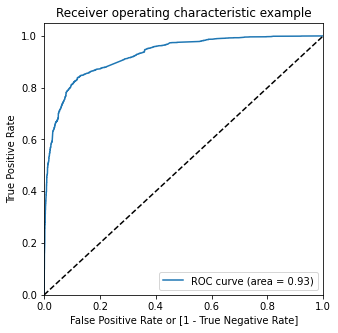

In [145]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conve_prob)

area under the curve is 0.93

### Finding optimal cutoff point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [146]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conve_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conve_prob,CustId,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.246566,4715,0,1,1,1,0,0,0,0,0,0,0
1,1,0.683232,7132,1,1,1,1,1,1,1,1,0,0,0
2,0,0.053724,8954,0,1,0,0,0,0,0,0,0,0,0
3,0,0.040528,5283,0,1,0,0,0,0,0,0,0,0,0
4,0,0.702214,3003,1,1,1,1,1,1,1,1,1,0,0


In [147]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.384045  1.000000  0.000000
0.1   0.1  0.727737  0.962158  0.581576
0.2   0.2  0.759895  0.934380  0.651104
0.3   0.3  0.845702  0.860709  0.836345
0.4   0.4  0.864409  0.826892  0.887801
0.5   0.5  0.866729  0.791063  0.913906
0.6   0.6  0.859771  0.740741  0.933986
0.7   0.7  0.845238  0.661836  0.959588
0.8   0.8  0.812461  0.541868  0.981175
0.9   0.9  0.777211  0.433977  0.991215


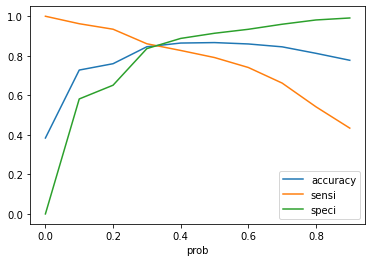

In [148]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

from above graph we will take cutoff point as 0.34

In [149]:
# values when we tak 0.34 as threshold
met_cal_2 = calculate_metrics(X_train, y_train, m6, 0.34)
print(met_cal_2[-1])

Dataframe:
    Converted  Conve_prob  CustId  Predicted
0          0    0.246566    4715          0
1          1    0.683232    7132          1
2          0    0.053724    8954          0
3          0    0.040528    5283          0
4          0    0.702214    3003          1

Confusion metrics:
[[3433  551]
 [ 376 2108]]

Accuracy score: 0.8566790352504638

Precision: 0.7927792403159082

Sensitivity/ Recall: 0.8486312399355878

Specificity: 0.8616967871485943


### Precision and recall tradeoff

In [150]:
met_cal_3 = calculate_metrics(X_train, y_train, m6, 0.5)
print(met_cal_3[-1])

Dataframe:
    Converted  Conve_prob  CustId  Predicted
0          0    0.246566    4715          0
1          1    0.683232    7132          1
2          0    0.053724    8954          0
3          0    0.040528    5283          0
4          0    0.702214    3003          1

Confusion metrics:
[[3641  343]
 [ 519 1965]]

Accuracy score: 0.8667285095856524

Precision: 0.8513864818024264

Sensitivity/ Recall: 0.7910628019323671

Specificity: 0.9139056224899599


In [151]:
from sklearn.metrics import precision_recall_curve

In [152]:
y_train_pred_final, confusion, accuracy, precision, recall, specificity = met_cal_3[0], met_cal_3[1], met_cal_3[2], met_cal_3[3], met_cal_3[4], met_cal_3[5]

In [153]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       1
 2       0
 3       0
 4       0
        ..
 6463    0
 6464    0
 6465    1
 6466    0
 6467    1
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       1
 2       0
 3       0
 4       1
        ..
 6463    0
 6464    0
 6465    1
 6466    0
 6467    1
 Name: Predicted, Length: 6468, dtype: int64)

In [154]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conve_prob)

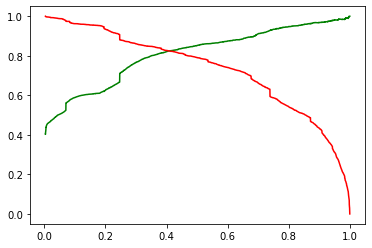

In [155]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

From precision_recall_curve we can see that 0.42 is the cutoff_value/thresholds.

## Test set prediction
- Predict test set results 
- compare with train set results

In [156]:
# all metrics for test set
test_set_cal = calculate_metrics(X_test, y_test, m6, 0.42)
print(test_set_cal[-1])

Dataframe:
    Converted  Conve_prob  CustId  Predicted
0          1    0.973941    4608          1
1          0    0.102145    7935          0
2          0    0.006324    4043          0
3          0    0.015148    7821          0
4          0    0.238539     856          0

Confusion metrics:
[[1525  170]
 [ 174  903]]

Accuracy score: 0.8759018759018758

Precision: 0.8415657036346692

Sensitivity/ Recall: 0.8384401114206128

Specificity: 0.8997050147492626


In [157]:
# all metrics for train set
train_set_cal = calculate_metrics(X_train, y_train, m6, 0.42)
print(train_set_cal[-1])

Dataframe:
    Converted  Conve_prob  CustId  Predicted
0          0    0.246566    4715          0
1          1    0.683232    7132          1
2          0    0.053724    8954          0
3          0    0.040528    5283          0
4          0    0.702214    3003          1

Confusion metrics:
[[3557  427]
 [ 442 2042]]

Accuracy score: 0.8656462585034014

Precision: 0.8270554880518428

Sensitivity/ Recall: 0.822061191626409

Specificity: 0.8928212851405622


### Alloting lead score and finding Hot leads from them
- Customers which should be contacted are the customers whose Lead score is >=80

In [158]:
# combine both train set final and test set final (predicted above)
combined_data = pd.concat([train_set_cal[6], test_set_cal[6]])
combined_data.head()

,Converted,Conve_prob,CustId,Predicted
0,0,0.246566,4715,0
1,1,0.683232,7132,1
2,0,0.053724,8954,0
3,0,0.040528,5283,0
4,0,0.702214,3003,1


In [159]:
combined_data.shape

(9240, 4)

In [160]:
combined_data['Lead_score'] = round(combined_data['Conve_prob']*100,0)
combined_data.head()

,Converted,Conve_prob,CustId,Predicted,Lead_score
0,0,0.246566,4715,0,25.0
1,1,0.683232,7132,1,68.0
2,0,0.053724,8954,0,5.0
3,0,0.040528,5283,0,4.0
4,0,0.702214,3003,1,70.0


In [161]:
score_80 = combined_data[combined_data['Lead_score']>=80]
score_80

,Converted,Conve_prob,CustId,Predicted,Lead_score
7,1,0.967034,3166,1,97.0
10,1,0.999397,7420,1,100.0
11,1,0.998146,4782,1,100.0
15,1,0.989286,3817,1,99.0
17,1,0.993492,2598,1,99.0
...,...,...,...,...,...
2747,1,0.989230,7288,1,99.0
2749,1,0.947973,2314,1,95.0
2760,1,0.914133,622,1,91.0
2764,1,0.909339,4240,1,91.0


- So there are 2059 leads which can be contacted and have high chances of getting converted.
- The CustId of the customers are given below

In [162]:
score_80['CustId'].values.reshape(-1)

array([3166, 7420, 4782, ...,  622, 4240, 7036], dtype=int64)

In [163]:
confusion_matrix(score_80['Converted'], score_80['Predicted'])

array([[   0,  111],
       [   0, 1948]], dtype=int64)

As you can see 1948 customers have actualy converted out of 2059

In [164]:
# from predicted hot leads lead conversion rate 
100*1948/2059

94.6090335114133

## Conclustion
- As we can see the Precision, Sensitivity/Recall, specificity, accuracy all the scores are >80%
- There is not much difference between train set accuracy and test set accuracy(no overfitting)
- There are 2059 leads which can be contacted and have high chances of getting converted.
- 94% conversion rate from hot leads